# Radiative processes: interactive examples

In this script, we will review the radiative emission from different processes produced by a non-thermal energy distribution of relativistic particles. 

The aim is to visualise and better understand the dependence of these processes on the physical parameters involved in gamma-ray production, as well as how the emission changes with varying particle energy distribution parameters.

In this script, we will discuss: neutral pion decay, bremsstrahlung, synchrotron and inverse Compton scattering.

In [112]:
from naima.models import ExponentialCutoffBrokenPowerLaw
import numpy as np
import naima
import matplotlib.pyplot as plt
from astropy.constants import c, sigma_sb, k_B, h
import astropy.units as u
from astropy.io import ascii
import ipywidgets as widgets
from ipywidgets import interact

# Neutral pion decay


<img src="images/npi_decay.png" alt="a" width="300">

Source: C. Grupen, Astroparticle Physics, Undergraduate Texts in Physics, Springer (2020),
10.1007/978-3-030-27339-2

In [113]:
# Define the energy range for the spectrum (from 10^8 eV to 10^13 eV with 100 points)
energy_range = np.logspace(8, 13, 50) * u.eV

# Function to update and plot the Spectral Energy Distribution (SED) based on user input
def update_plot_pion_decay(distance_kpc, p, e_cutoff_GeV, n_target_cm3):
    """
    Updates the plot of the SED for a pion decay model.
    Allows interactive changes to distance, spectral index, cutoff energy, and target number density.

    Parameters
    ----------
    distance_kpc : float
        Distance to the source in kiloparsecs (kpc).
    p : float
        Spectral index of the proton energy distribution.
    e_cutoff_GeV : float
        Cutoff energy of the proton energy distribution in giga-electronvolts (GeV).
    n_target_cm3 : float
        Target number density for pp interactions, in particles per cubic centimeter (cm^-3).
    """

    # Convert input values to astropy units
    distance = distance_kpc * u.kpc  # Assign kpc unit to the distance_kpc variable, hereafter distance
    e_cutoff = e_cutoff_GeV * u.GeV  # Assign GeV unit to the e_cutoff_GeV variable, hereafter e_cutoff
    n_target = n_target_cm3 * u.cm ** -3  # Convert target density to proper unit
    
    # Define a particle distribution model using an exponential cutoff power law
    part_dist = naima.models.ExponentialCutoffPowerLaw(
        amplitude=1e36 / u.eV,  # Set a normalization value for the spectrum
        e_0=1 * u.GeV,  # Reference energy of 100 GeV
        alpha=p,  # Spectral index of particles (determines shape of the power-law)
        e_cutoff=e_cutoff  # Apply the user-defined cutoff energy
    )
    
    # Create a pion decay radiation model using the particle distribution and target density
    rad_models = naima.models.PionDecay(particle_distribution=part_dist, nh=n_target)
    
    # Compute the spectral energy distribution (SED) for the given energy range and distance
    sed = rad_models.sed(photon_energy=energy_range, distance=distance)

    # Clear the previous figure and generate a new plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(f"Total energy in protons above 1 GeV: "+\
              f"{rad_models.compute_Wp(1*u.GeV):1.0e}")
    ax.loglog(
        energy_range, sed,  # Plot the SED on a log-log scale (SED vs. energy)
        label=f"Distance = {distance_kpc:.2f} kpc,\n"+\
            f"$p = {p:.1f}$,\n"+\
            f"$E_{{\\rm cutoff}} = {e_cutoff_GeV:.0f}$ GeV,\n"+\
            f"$n_{{\\rm target}} = {n_target_cm3:.1e}$ cm$^{{-3}}$"
    )
    ax.set_xlabel("Energy, $E$ (eV)")  # Label x-axis with energy in electron volts
    ax.set_ylabel("$E^2$ d$\\phi$/d$E$ (erg cm$^{-2}$ s$^{-1}$)")  # Label y-axis
    ax.legend(loc="best")  # Display legend with current parameters
    ax.grid(True, which="both", linestyle="--", alpha=0.6)  # Add grid to the plot
    ax.set_ylim(1e-13, 1e-9)  # Set limits for y-axis
    plt.show()  # Display the plot

# Create interactive sliders for adjusting the parameters

# Slider for distance (in kiloparsecs, using a logarithmic scale)
# This slider allows the user to adjust the distance to the source in kiloparsecs (kpc)
distance_slider = widgets.FloatLogSlider(
    value=2, min=-1, max=1, step=0.1, base=10,  # Slider range and scale
    description="Distance (kpc)",  # Label for the slider
    style={'description_width': '110px'},  # Style adjustment for label width
    layout=widgets.Layout(width='500px')  # Layout adjustment for the slider width
)

# Slider for spectral index
# This slider allows the user to adjust the spectral index of the proton energy distribution
p_slider = widgets.FloatSlider(
    value=2, min=1.5, max=3, step=0.1,  # Slider range and scale
    description="p",  # Label for the slider
    style={'description_width': '110px'},  # Style adjustment for label width
    layout=widgets.Layout(width='500px')  # Layout adjustment for the slider width
)

# Slider for cutoff energy (in GeV, using a logarithmic scale)
# This slider lets the user adjust the cutoff energy for the particle spectrum (in GeV)
e_cutoff_slider = widgets.FloatLogSlider(
    value=300, min=1, max=4, step=0.1, base=10,  # Slider range and scale for the cutoff energy
    description="E_cutoff (GeV)",  # Label for the slider
    style={'description_width': '110px'},  # Style adjustment for label width
    layout=widgets.Layout(width='500px')  # Layout adjustment for the slider width
)

# Slider for target density (in cm^-3, using a logarithmic scale)
# This slider allows the user to adjust the target density of particles in the environment (cm^-3)
target_density_slider = widgets.FloatLogSlider(
    value=1e8, min=1, max=10, step=1, base=10,  # Slider range and scale for target density
    description=fr"n_target (cm⁻³)",  # Label for the slider
    style={'description_width': '110px'},  # Style adjustment for label width
    layout=widgets.Layout(width='500px')  # Layout adjustment for the slider width
)

# Link the sliders to the update function for interactive plotting
# This function will update the plot based on the values selected by the sliders
interact(
    update_plot_pion_decay, 
    distance_kpc=distance_slider,  # Link distance slider to the function
    p=p_slider,  # Link alpha slider to the function
    e_cutoff_GeV=e_cutoff_slider,  # Link cutoff energy slider to the function
    n_target_cm3=target_density_slider  # Link target density slider to the function
);

interactive(children=(FloatLogSlider(value=2.0, description='Distance (kpc)', layout=Layout(width='500px'), ma…

For reference, below you can find some typical number densities in astrophysical sources (from Metzger et al. 2016, MNRAS, 457, 1786):

- Intergalactic medium : n ~ $10^{-5}$&ndash;$10^{-4}~\rm{cm}^{-3}$

- Supernova (SN) remnants : n ~ $1~\rm{cm}^{-3}$

- Interplanetary medium : n ~ $1$&ndash;$10~\rm{cm}^{-3}$

- SNR-cloud interactions: n ~ $10$&ndash;$10^{3}~ \rm{cm}^{-3}$

- Regions in which there are massive young stellar objects: n ~ $10^{3}$&ndash;$10^{6}~\rm{cm}^{-3}$ (from Bosch-Ramon et al. 2010, A&A, 511, A8)

- Type IIn SNe: n ~ $10^{6}$&ndash;$10^{10}~ \rm{cm}^{-3}$

- Novae: n ~ $10^{8}$&ndash;$10^{11}~ \rm{cm}^{-3}$

# Bremsstrahlung

<img src="images/bremsstrahlung.png" alt="a" width="400">

Source: C. Grupen, Astroparticle Physics, Undergraduate Texts in Physics, Springer (2020),
10.1007/978-3-030-27339-2

In [128]:
# Define energy range
energy_range = np.logspace(8, 13, 100) * u.eV

# Function to update SED plot based on distance, spectral index, e_cutoff, and medium density
def update_plot_bremsstrahlung(distance_kpc, p, e_cutoff_GeV, n_medium_cm3):
    """
    Function to feed interactive widgets to update the plot of the 
    SED for a Bremsstrahlung model. You can change the distance,
    alpha, cutoff energy, and medium density.

    Parameters
    ----------
    distance_kpc : float
        Distance to the source in kpc.
    p : float
        Spectral index of the electron energy distribution.
    e_cutoff_GeV : float
        Cutoff energy of the electron energy distribution in GeV.
    n_medium_cm3 : float
        Number density of the medium in cm^-3.
    """
    # Convert input values to astropy units
    distance = distance_kpc * u.kpc
    e_cutoff = e_cutoff_GeV * u.GeV
    n_medium = n_medium_cm3 * u.cm ** -3
    
    # Define particle distribution with the given cutoff energy
    part_dist = naima.models.ExponentialCutoffPowerLaw(
        amplitude=1e31 / u.eV,
        e_0=100 * u.GeV,
        alpha=p,
        e_cutoff=e_cutoff
    )
    
    # Create radiation model for Bremsstrahlung
    rad_models = naima.models.Bremsstrahlung(part_dist, n0=n_medium)
    
    # Compute SED
    sed = rad_models.sed(energy_range, distance=distance)

    # Clear previous figure and plot new SED
    fig,ax = plt.subplots(1,1,figsize=(8, 6))
    ax.set_title(f"Total energy in electrons above 1 GeV: "+\
              f"{rad_models.compute_We(1*u.GeV):1.0e}")
    ax.loglog(
        energy_range, sed,
        label=f"Distance = {distance_kpc:.2f} kpc,\n"+\
            f"$p = {p:.1f}$,\n"+\
            f"$E_{{\\rm cutoff}} = {e_cutoff_GeV:.0f}$ GeV,\n"+\
            f"$n_{{\\rm medium}} = {n_medium_cm3:.1e}$ cm$^{{-3}}$"
    )
    ax.set_xlabel("Energy, $E$ (eV)")
    ax.set_ylabel("$E^2$ d$\\phi$/d$E$ (erg cm$^{-2}$ s$^{-1}$)")
    ax.legend(loc="best")
    ax.grid(True, which="both", linestyle="--", alpha=0.6)
    ax.set_ylim(1e-13, 1e-9)
    plt.show()

# Create sliders for distance, cutoff energy and target density
distance_slider = widgets.FloatLogSlider(
    value=2, min=-1, max=1, step=0.1, base=10, 
    description="Distance (kpc)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

p_slider = widgets.FloatSlider(
    value=2, min=1.5, max=3, step=0.1,
    description="p",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

e_cutoff_slider = widgets.FloatLogSlider(
    value=300, min=1, max=4, step=0.1, base=10, 
    description="E_cutoff (GeV)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

n_medium_slider = widgets.FloatLogSlider(
    value=1e7, min=1, max=10, step=0.1, base=10, 
    description="n_medium (cm⁻³)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

# Create interactive widgets
interact(update_plot_bremsstrahlung, 
         distance_kpc=distance_slider,
         p=p_slider,
         e_cutoff_GeV=e_cutoff_slider,
         n_medium_cm3=n_medium_slider
);

interactive(children=(FloatLogSlider(value=2.0, description='Distance (kpc)', layout=Layout(width='500px'), ma…

Naima considers a fully ionised medium with solar abundances. Electron-ion bremsstrahlung is the only process that is considered above $10~ \rm MeV$.

# Synchrotron

<img src="images/synchrotron.png" alt="a" width="600">

Source: C. Grupen, Astroparticle Physics, Undergraduate Texts in Physics, Springer (2020),
10.1007/978-3-030-27339-2

In [144]:
# Define energy range
energy_range = np.logspace(-9, 13, 100) * u.eV

# Function to update SED plot based on distance, spectral index, e_cutoff, and magnetic field
def update_plot_synchrotron(distance_kpc, p, e_cutoff_GeV, B_uGauss):
    """
    Function to feed interactive widgets to update plot of the 
    SED for an synchrotron model. You can change the distance,
    spectral index, cutoff energy, and magnetic field.

    Parameters
    ----------
    distance_kpc : float
        Distance to the source in kpc.
    p : float
        Spectral index of the electron energy distribution.
    e_cutoff_GeV : float
        Cutoff energy of the electron energy distribution in GeV.
    B_uGauss : float
        Magnetic field for synchrrotron radiation in microgauss (uG).
    """
    # Convert input values to astropy units
    distance = distance_kpc * u.kpc
    e_cutoff = e_cutoff_GeV * u.GeV
    magnetic_field = B_uGauss * u.uG
    energy_range = np.logspace(-9, 13, 100) * u.eV

    # Define particle distribution with the given cutoff energy
    part_dist = naima.models.ExponentialCutoffPowerLaw(
        amplitude=1e36 / u.eV,
        e_0=100 * u.GeV,
        alpha=p,
        e_cutoff=e_cutoff
    )
    
    # Compute Synchrotron emission
    rad_models = naima.models.Synchrotron(part_dist, B=magnetic_field)
    
    # Compute SED
    sed = rad_models.sed(energy_range, distance=distance)

    # Clear previous figure and plot new SED
    fig, ax = plt.subplots(1,1,figsize=(8, 6))
    ax.set_title(f"Total energy in electrons above 1 GeV: "+\
              f"{rad_models.compute_We(1*u.GeV):1.0e}")
    ax.loglog(
        energy_range, sed,
        label=f"Distance = {distance_kpc:.2f} kpc,\n"+\
              f"$p = {p:.1f}$,\n"+\
              f"$E_{{\\rm cutoff}} = {e_cutoff_GeV:.0f}$ GeV,\n"+\
              f"$B = {B_uGauss:1.0f}$ µG"
    )
    ax.set_xlabel("Energy, $E$ (eV)")
    ax.set_ylabel("$E^2$ d$\\phi$/d$E$ (erg cm$^{-2}$ s$^{-1}$)")
    ax.legend(loc="best")
    ax.grid(True, which="both", linestyle="--", alpha=0.6)
    ax.set_ylim(1e-13, 1e-9)

    # Create a secondary x-axis for frequency
    ax2 = ax.twiny()
    ax2.set_xscale("log")
    # Convert energy to frequency using ν = E / h
    spectrum_freq = (energy_range / h).to(u.Hz)
    ax2.set_xlim(spectrum_freq[0].value, spectrum_freq[-1].value)
    ax2.set_xlabel("Frequency (Hz)")

    plt.show()

# Create sliders for distance, cutoff energy and magnetic field
distance_slider = widgets.FloatLogSlider(
    value=2, min=-1, max=1, step=0.1, base=10, 
    description="Distance (kpc)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

p_slider = widgets.FloatSlider(
    value=2, min=1.5, max=3, step=0.1,
    description="p",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

e_cutoff_slider = widgets.FloatLogSlider(
    value=300, min=1, max=4, step=0.1, base=10, 
    description="E_cutoff (GeV)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

B_slider = widgets.FloatLogSlider(
    value=10, min=-1, max=4, step=0.1, base=10, 
    description="B (µG)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

# Create interactive widgets
interact(update_plot_synchrotron, 
         distance_kpc=distance_slider,
         p=p_slider,
         e_cutoff_GeV=e_cutoff_slider,
         B_uGauss=B_slider
);

interactive(children=(FloatLogSlider(value=2.0, description='Distance (kpc)', layout=Layout(width='500px'), ma…

In [117]:
from scipy.special import gamma

def c6(p):
    c1 = 6.27e18 # (3e)/(4pi m^3c^5)
    c3 = 1.87e-23 # (3^0.5 e^3)/(4pi mc^2)
    c = 29979245800
    return (1/32) * (c/c1)**2 * c3 * (p+10/3) * gamma((3*p+2)/12) * gamma((3*p+10)/12)

def c5(p):
    c1 = 6.27e18 # (3e)/(4pi m^3c^5)
    c3 = 1.87e-23 # (3^0.5 e^3)/(4pi mc^2)
    c = 29979245800
    return 1/4 * c3 * gamma((3*p-1)/12) * gamma((3*p+7)/12) * ((p+7/3)/(p+1))

def nu_1(p, NT, B):
    c1 = 6.27e18 # (3e)/(4pi m^3c^5)
    return 2 * c1 * (c6(p))**(2/(p+4)) * NT**(2/(p+4)) * B**((p+2)/(p+4))

def S_nu_1(p, NT, B):
    c1 = 6.27e18 # (3e)/(4pi m^3c^5)
    return c5(p)/c6(p) * B**(-1/2) * (nu_1(p, NT, B)/(2*c1))**(5/2)

def I_nu(nu, p, NT, B):
    z = nu / nu_1(p, NT, B)
    return S_nu_1(p, NT, B) * z**(5/2) * (1 - np.exp(-z**(-(p+4)/2)))


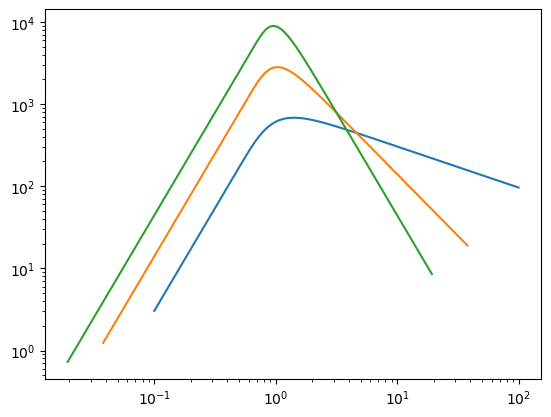

In [118]:
nu_array=nu_1(2, 1e30, 10e-6) * np.geomspace(1e-1,1e2,100)
plt.loglog(
    nu_array / nu_1(2, 1e30, 10e-6),
    I_nu(nu_array, 2, 1e30, 10e-6)
)

plt.loglog(
    nu_array / nu_1(4, 1e30, 10e-6),
    I_nu(nu_array, 4, 1e30, 10e-6)
)

plt.loglog(
    nu_array / nu_1(6, 1e30, 10e-6),
    I_nu(nu_array, 6, 1e30, 10e-6)
)

In [119]:
part_dist = naima.models.ExponentialCutoffPowerLaw(
    amplitude=1e36 / u.eV,
    e_0=100 * u.GeV,
    alpha=3,
    e_cutoff=316*u.GeV
)


In [120]:
np.sum(part_dist(np.geomspace(1,1e9,1000)*u.eV))/1000

<Quantity 1.65740815e+67 1 / eV>

- Can you identify the absorbed component of the synchrotron emission?
- What is the spectral index of the emission in the optically thin energies? What about in the optically thick?

# Inverse Compton

<img src="images/ic.png" alt="a" width="600">

Source: C. Grupen, Astroparticle Physics, Undergraduate Texts in Physics, Springer (2020),
10.1007/978-3-030-27339-2

In [121]:
# Define energy range
energy_range = np.logspace(8, 13, 100) * u.eV

# Function to update SED plot based on distance, spectral index, e_cutoff, and photon field
def update_plot_inverse_compton(distance_kpc, p, e_cutoff_GeV, photon_field):
    """
    Function to feed interactive widgets to update plot of the 
    SED for an Inverse Compton model. You can change the distance,
    cutoff energy, and seed photon field.

    Parameters
    ----------
    distance_kpc : float
        Distance to the source in kpc.
    p : float
        Spectral index of the electron energy distribution.
    e_cutoff_GeV : float
        Cutoff energy of the electron energy distribution in GeV.
    photon_field : str
        Seed photon field for Inverse Compton interaction.
    """
    # Convert input values to astropy units
    distance = distance_kpc * u.kpc
    e_cutoff = e_cutoff_GeV * u.GeV
    photon_seed = photon_field  # No conversion needed
    
    # Define particle distribution with the given cutoff energy
    part_dist = naima.models.ExponentialCutoffPowerLaw(
        amplitude=1e36 / u.eV,
        e_0=100 * u.GeV,
        alpha=p,
        e_cutoff=e_cutoff
    )
    
    # Define additional label for the plot
    if photon_field == "CMB":
        additional_label = "\n($T=2.72$ K, $U_{{\\rm ph}}=0.261$ eV/cm³)"
    elif photon_field == "FIR":
        additional_label = "\n($T=30$ K, $U_{{\\rm ph}}=0.5$ eV/cm³)"
    elif photon_field == "NIR":
        additional_label = "\n($T=3000$ K, $U_{{\\rm ph}}=1$ eV/cm³)"
    elif photon_field == "Hot star":
        Temp=30000 * u.K
        # characteristic_temp=(Temp*k_B).to("eV")
        star_radius=10 * u.Rsun
        radius_process=5000 * u.Rsun
        L=4 * np.pi * sigma_sb * star_radius**2 * Temp**4
        Uph=(L/(4*np.pi*c*radius_process**2)).to("erg cm-3")
        photon_seed=['Hot star', Temp, Uph] 
        additional_label = f"\n($T={Temp.to_value(u.K):1.0f}$ K"+\
                           f", $U_{{\\rm ph}}={Uph.to_value('erg cm-3'):1.3f}$ erg/cm³)"
    else:
        additional_label = ""

    # Create radiation model for Inverse Compton
    rad_models = naima.models.InverseCompton(part_dist, seed_photon_fields=[photon_seed])
    
    # Compute SED
    sed = rad_models.sed(energy_range, distance=distance)

    # Clear previous figure and plot new SED
    fig, ax= plt.subplots(1,1,figsize=(8, 6))
    ax.set_title(f"Total energy in electrons above 1 GeV: "+\
              f"{rad_models.compute_We(1*u.GeV):1.0e}")

    ax.loglog(
        energy_range, sed,
        label=f"Distance = {distance_kpc:.2f} kpc,\n"+\
              f"$E_{{\\rm cutoff}} = {e_cutoff_GeV:.0f}$ GeV,\n"+\
              f"Photon Seed = {photon_field}{additional_label}"
    )
    ax.set_xlabel("Energy, $E$ (eV)")
    ax.set_ylabel("$E^2$ d$\\phi$/d$E$ (erg cm$^{-2}$ s$^{-1}$)")
    ax.legend(loc="best")
    ax.grid(True, which="both", linestyle="--", alpha=0.6)
    ax.set_ylim(1e-13, 1e-9)
    plt.show()

# Create interactive widgets
distance_slider = widgets.FloatLogSlider(
    value=2, min=-1, max=1, step=0.1, base=10, 
    description="Distance (kpc)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

p_slider = widgets.FloatSlider(
    value=2, min=1.5, max=3, step=0.1,
    description="p",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

e_cutoff_slider = widgets.FloatLogSlider(
    value=300, min=1, max=4, step=0.1, base=10, 
    description="E_cutoff (GeV)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

photon_field_dropdown = widgets.Dropdown(
    options=['CMB', 'FIR', 'NIR', 'Hot star'],
    value='CMB',
    description="Photon Seed:",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='300px')
)

# Create interactive widgets
interact(update_plot_inverse_compton, 
         distance_kpc=distance_slider,
         p=p_slider,
         e_cutoff_GeV=e_cutoff_slider,
         photon_field=photon_field_dropdown
);

interactive(children=(FloatLogSlider(value=2.0, description='Distance (kpc)', layout=Layout(width='500px'), ma…

Description of the available photon seeds:

- CMB: Simulate the cosmic microwave background, i.e., isotropic photons with $T=2.72~ \rm K$ and photon energy density $U_{\rm ph}=0.261~ \rm eV/cm^{3}$

- FIR: Simulate the far-infrared dust emission, i.e., isotropic photons with $T=30~ \rm K$ and photon energy density $U_{\rm ph}=0.5~ \rm eV/cm^{3}$

- NIR: Simulate the near-infrared stellar emission, i.e., isotropic photons with $T=3,000~ \rm K$ and photon energy density $U_{\rm ph}=1~ \rm eV/cm^{3}$

- Hot star: Simulate the photons from a hot star (O-B) next to a compact object in a binary system. Specific details: photons with $T=30,000~ \rm K$ and photon energy density at $5000~R_\odot$, i.e., $U_{\rm ph}=6.1\times 10^{-3} ~ \rm erg/cm^{3}$ ($=3.81\times 10^{9} ~ \rm eV/cm^{3}$)

# Syncrotron self-Compton

In [151]:
# Define the energy range for the spectrum (from 10^-10 eV to 10^14 eV with 100 points)
spectrum_energy = np.logspace(-10, 14, 100) * u.eV

# Function to update SED plot based on distance, e_cutoff, and magnetic field
def update_plot_synch_ic(distance_kpc, p, e_cutoff_GeV, B_uGauss):
    """
    Updates the plot of the SED for a combined Synchrotron and Inverse Compton (IC) model
    undergoing syncrotron self-Compton emission.
    Allows interactive changes to distance, p, cutoff energy, and magnetic field strength.

    Parameters
    ----------
    distance_kpc : float
        Distance to the source in kpc.
    p : float
        Spectral index of the electron energy distribution.
    e_cutoff_GeV : float
        Cutoff energy of the electron energy distribution in GeV.
    B_uGauss : float
        Magnetic field strength in uG.
    """
    # Convert input values to appropriate astropy units
    distance = distance_kpc * u.kpc
    e_cutoff = e_cutoff_GeV * u.GeV
    B = B_uGauss * u.uG
    
    # Define a particle distribution model using an exponential cutoff power law
    part_dist = naima.models.ExponentialCutoffPowerLaw(
        amplitude=1e36 / u.eV,
        e_0=100 * u.GeV,
        alpha=p,
        e_cutoff=e_cutoff
    )
    
    # Compute Synchrotron emission based on the particle distribution and magnetic field
    SYN = naima.models.Synchrotron(part_dist, B=B)
    
    # Define energy array for synchrotron seed photon field
    Esy = np.logspace(-6, 6, 100) * u.eV  # Energy range for synchrotron photons
    Lsy = SYN.flux(Esy, distance=0 * u.cm)  # Compute synchrotron flux at the source

    # Define source radius and compute photon density
    R = 0.01 * u.pc  # Source radius set to 0.01 parsecs
    # The factor 2.24 accounts for geometrical considerations of a uniform spherical emitter
    phn_sy = Lsy / (4 * np.pi * R**2 * c) * 2.24  # Compute seed photon energy density

    # Compute Inverse Compton emission including multiple seed photon fields
    IC = naima.models.InverseCompton(
        part_dist, seed_photon_fields=[['SSC', Esy, phn_sy]]#, 'CMB', 'FIR', 'NIR']
    )

    # Compute SEDs for both Synchrotron and Inverse Compton
    sed_IC = IC.sed(spectrum_energy, distance=distance)
    sed_SYN = SYN.sed(spectrum_energy, distance=distance)

    # Clear previous figure and generate a new plot
    fig, ax = plt.subplots(1,1,figsize=(8, 6))
    ax.set_title(f"Total energy in electrons above 1 GeV: {IC.compute_We(1*u.GeV):1.0e}")
    ax.loglog(spectrum_energy, sed_SYN, label="Synchrotron")
    ax.loglog(spectrum_energy, sed_IC, label="Inverse Compton")
    
    ax.set_xlabel("Energy, $E$ (eV)")
    ax.set_ylabel("$E^2$ d$\\phi$/d$E$ (erg cm$^{-2}$ s$^{-1}$)")
    ax.legend(
        title=f"Distance = {distance_kpc:.2f} kpc,\n"
        f"$p = {p:.1f}$,\n"
        f"$E_{{\\rm cutoff}} = {e_cutoff_GeV:.0f}$ GeV,\n"
        f"$B = {B_uGauss:.1f}$ µG",
        loc="best"
    )
    ax.grid(True, which="both", linestyle="--", alpha=0.6)
    ax.set_ylim(1e-13, 1e-6)

    # Create a secondary x-axis for frequency
    ax2 = ax.twiny()
    ax2.set_xscale("log")
    # Convert energy to frequency using ν = E / h
    spectrum_freq = (spectrum_energy / h).to(u.Hz)
    ax2.set_xlim(spectrum_freq[0].value, spectrum_freq[-1].value)
    ax2.set_xlabel("Frequency (Hz)")

    plt.show()

# Create interactive sliders for adjusting the parameters

# Slider for distance (in kiloparsecs, logarithmic scale)
distance_slider = widgets.FloatLogSlider(
    value=1.4, min=-1, max=1, step=0.1, base=10,  
    description="Distance (kpc)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

p_slider = widgets.FloatSlider(
    value=2, min=1.5, max=3, step=0.1,
    description="p",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

# Slider for cutoff energy (in GeV, logarithmic scale)
e_cutoff_slider = widgets.FloatLogSlider(
    value=300, min=1, max=4, step=0.1, base=10,  
    description="E_cutoff (GeV)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

# Slider for magnetic field strength (in microGauss, logarithmic scale)
B_slider = widgets.FloatLogSlider(
    value=100, min=-1, max=4, step=0.1, base=10,  
    description="B (µG)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

# Link the sliders to the update function for interactive plotting
interact(update_plot_synch_ic, 
         distance_kpc=distance_slider,
         p=p_slider,
         e_cutoff_GeV=e_cutoff_slider,
         B_uGauss=B_slider
);

interactive(children=(FloatLogSlider(value=1.4, description='Distance (kpc)', layout=Layout(width='500px'), ma…

# Let's try to fit the Crab Nebula spectrum by hand

In [ ]:
# Load spectrum data from the Crab Nebula (ECVS format)
data = ascii.read("../data/CrabNebula/CrabNebula_spectrum.ecsv")

# Function to update and plot the Spectral Energy Distribution (SED)
# based on distance, cutoff energy, and magnetic field strength
def update_plot_synch_ic(distance_kpc, e_cutoff_TeV, B_uGauss):
    """
    Updates the plot of the SED for a combined Synchrotron and Inverse Compton model.
    Allows interactive changes to the distance, cutoff energy, and magnetic field strength.

    Parameters
    ----------
    distance_kpc : float
        Distance to the source in kpc.
    e_cutoff_TeV : float
        Cutoff energy of the electron energy distribution in TeV.
    B_uGauss : float
        Magnetic field strength in µG.
    """
    # Convert input values to appropriate astropy units
    distance = distance_kpc * u.kpc
    e_cutoff = e_cutoff_TeV * u.TeV
    B = B_uGauss * u.uG
    
    # Define the particle distribution model with an exponential cutoff (broken power law)
    part_dist = naima.models.ExponentialCutoffBrokenPowerLaw(
        amplitude=3.699e36 / u.eV,  # Amplitude (normalization) for the spectrum
        e_0=1 * u.TeV,  # Reference energy (in TeV)
        e_break=0.265 * u.TeV,  # Break energy in the broken power law
        alpha_1=1.5,  # Spectral index before the break
        alpha_2=3.233,  # Spectral index after the break
        e_cutoff=e_cutoff,  # Apply the user-defined cutoff energy
        beta=2.0,  # Break smoothness factor
    )
    
    # Compute Synchrotron emission based on the particle distribution and magnetic field
    SYN = naima.models.Synchrotron(part_dist, B=B, Eemax=50 * u.PeV, Eemin=0.1 * u.GeV)
    
    # Define an energy array for the synchrotron seed photon field (synchrotron photons)
    Esy = np.logspace(-6, 6, 100) * u.eV
    Lsy = SYN.flux(Esy, distance=0 * u.cm)

    # Define the source radius and calculate the photon energy density for synchrotron seed photons
    R = 2 * u.pc
    phn_sy = Lsy / (4 * np.pi * R**2 * c) * 2.24 

    # Compute Inverse Compton emission considering various seed photon fields (CMB, FIR, NIR, SSC)
    IC = naima.models.InverseCompton(
        part_dist,     
        seed_photon_fields=[
            "CMB",
            ["FIR", 70 * u.K, 0.5 * u.eV / u.cm**3],
            ["NIR", 5000 * u.K, 1 * u.eV / u.cm**3],
            ["SSC", Esy, phn_sy],
        ],
    )

    # Compute the Spectral Energy Distributions (SED) for Synchrotron and Inverse Compton
    spectrum_energy = np.logspace(-10, 14, 100) * u.eV
    sed_IC = IC.sed(spectrum_energy, distance=distance)
    sed_SYN = SYN.sed(spectrum_energy, distance=distance)

    # Convert energy to frequency using ν = E / h (Planck relation)
    spectrum_freq = (spectrum_energy / h).to(u.Hz)

    # Convert frequency to wavelength using λ = c / ν
    spectrum_wavelength = (c / spectrum_freq).to(u.m)

    # Create figure and axis for plotting
    fig, ax1 = plt.subplots(1,1,figsize=(8, 6))
    naima.plot_data(data, e_unit=u.eV, figure=fig)  # Plot the data

    # Plot SEDs for both Synchrotron and Inverse Compton
    ax1.loglog(spectrum_energy, sed_SYN, label="Synchrotron")
    ax1.loglog(spectrum_energy, sed_IC, label="Inverse Compton")

    # Format energy axis
    ax1.set_xlabel("Energy, $E$ (eV)")
    ax1.set_ylabel("$E^2$ d$\\phi$/d$E$ (erg cm$^{-2}$ s$^{-1}$)")
    ax1.legend(
        title=f"Distance = {distance_kpc:.2f} kpc,\n"
        f"$E_{{\\rm cutoff}} = {e_cutoff_TeV:.0f}$ TeV,\n"
        f"$B = {B_uGauss:.1f}$ µG",
        loc="best"
    )
    ax1.grid(True, which="both", linestyle="--", alpha=0.6)
    ax1.set_ylim(1e-13, 1e-6)

    # Create a secondary x-axis for frequency (in Hz)
    ax2 = ax1.twiny()
    ax2.set_xscale("log")
    ax2.set_xlim(spectrum_freq[0].value, spectrum_freq[-1].value)
    ax2.set_xlabel("Frequency (Hz)")

    # Create a third x-axis for wavelength (in meters)
    ax3 = ax1.twiny()
    ax3.set_xscale("log")
    ax3.set_xlim(spectrum_wavelength[0].value, spectrum_wavelength[-1].value)
    ax3.spines['top'].set_position(('outward', 40))
    ax3.set_xlabel("Wavelength (m)")

    # Display the plot
    plt.show()

# Create interactive sliders for adjusting parameters
distance_slider = widgets.FloatLogSlider(
    value=1.4, min=-1, max=1, step=0.1, base=10,
    description="Distance (kpc)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

e_cutoff_slider = widgets.FloatLogSlider(
    value=10, min=1, max=5, step=0.1, base=10,
    description="E_cutoff (TeV)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

B_slider = widgets.FloatLogSlider(
    value=10, min=-1, max=4, step=0.1, base=10,
    description="B (µG)",
    style={'description_width': '110px'},
    layout=widgets.Layout(width='500px')
)

# Create interactive plot using the sliders
interact(update_plot_synch_ic, 
         distance_kpc=distance_slider,
         e_cutoff_TeV=e_cutoff_slider,
         B_uGauss=B_slider
);

interactive(children=(FloatLogSlider(value=1.4, description='Distance (kpc)', layout=Layout(width='500px'), ma…